#Лабораторная работа 8


#**Кластеризация K-means**

## Меры и метрики расстояния между объектами

Метрика является функцией, задающей расстояние в метрическом пространстве. Как мы помним из курса линейной алгебры, она должна удовлетворять трем аксиомам:

1. $\rho(x, y) \geq 0, \rho(x, y) = 0 \Leftrightarrow x = y;$
2. $\rho(x, y) = \rho (y, x);$
3. $\rho(x, y) \leq \rho(x, z) + \rho(z, y).$

Евклидова метрика

$$\rho(x, y) = \sqrt{\sum_{i=1}^{n}(x_{i}-y_{i})^{2}}$$

и манхэттенская метрика

$$\rho(x, y) = \sum_{i=1}^{n}|x_{i}-y_{i}|$$

уже должны быть вам знакомы. 

Также можно показать обобщение этих двух метрик - метрика Минковского:

$$\rho(x, y) = \left ( \sum_{i=1}^{n}|x_{i}-y_{i}|^{q} \right )^{\frac{1}{q}}.$$

При этом при $q = 1$ получаем манхэттенскую ($L_{1}$) метрику, при $q = 2$ - евклидову ($L_{2}$) метрику.

Кроме этого, в метрических алгоритмах часто используются так называемые меры близости. В отличие от метрик, которые тем меньше, чем объекты более похожи, меры близости увеличиваются при увеличении похожести (близости) объектов.

Примером такой функции может быть _косинусное сходство (косинусная мера)_:

$$\text{cos}\theta = \frac{\left \langle x, y \right \rangle}{||x||\cdot||y||} = \frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sqrt{\sum_{i=1}^{n}x_{i}^{2}}\sqrt{\sum_{i=1}^{n}y_{i}^{2}}}.$$

Из этой функции также вытекает _косинусное расстояние_:

$$\rho_{cos}(x, y) = 1 - \text{cos}\theta = 1 - \frac{\sum_{i=1}^{n}x_{i}y_{i}}{\sqrt{\sum_{i=1}^{n}x_{i}^{2}}\sqrt{\sum_{i=1}^{n}y_{i}^{2}}}.$$

__Аналитический смысл__: объекты представлены в виде векторов, между двумя векторами образуется угол, значение косинуса этого угла – это и есть косинусная мера (следует из формулы скалярного произведения). 

__Почему эта функция - метрика?__

* f(x, x) = 0 - потому что arccos(1)=0
* f(x,y) = f(y,x) - по симметрии - очевидно, что угол между x и y равен углу между y и x
* f(x,y) >= 0 - потому что мы рассматриваем углы от 0 до 180 градусов
* неравенство треугольника (физический смысл)

Именно такая формула используется в функции `scipy.spatial.distance.cosine()` из библиотеки scipy, возвращающая косинусное расстояние между двумя векторами.

Кроме косинусной меры в прикладных задачах могут использоваться и другие функции - коэффициент Дайса, коэффициент Жаккара, коэффициент перекрытия (см. доп. материалы).

Формула нахождения косинусной меры похожа на _коэффициент корреляции_, который также может быть использован как мера близости и используется обычно в рекомендательных системах:

$$r = \frac{\sum_{i=1}^{n}((x_{i} - \bar{x})(y_{i} - \bar{y}))}{\sqrt{\sum_{i=1}^{n}(x_{i} - \bar{x})^{2}}\sqrt{\sum_{i=1}^{n}(y_{i} - \bar{y})^{2}}}$$

In [1]:
import numpy as np
from sklearn import model_selection
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from scipy.spatial import distance
from sklearn.datasets import make_blobs
from sklearn.cluster import DBSCAN, KMeans

Задание 1.
1.1. загрузить набор Ирисы Фишера (load_iris)

1.2. оценить расстояние между векторами из набора Ирисы Фишера по метрике из варианта:

  1) эвклид

  2) манхетенское расстояние

  3) косинусное расстояние

  4) минковский с r = 100

  5) минковский с r = -100

1.3. Из набора Ирисы Фишера определить среднее расстояние между объектами одного класса

1.4. Из набора Ирисы Фишера определить минимальное расстояние между объектами  разных классов (для всех 3-х классов)


In [2]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=1)
X = X[:, :2]

In [3]:
# расстояние минковского (р=2 - эвклид, р=1 - квартальное)
def dist_mincovski(X1,X2,p):
    if p != 0:
        return np.sum(np.abs(X1-X2)** p) ** 1/p
    else: return 1

def dist_cos(X1,X2):
    
    return 1 - (np.dot(X1.reshape(1,-1), X2.reshape(-1,1)))/np.sum(X1 ** 2)/ np.sum(X2 ** 2)

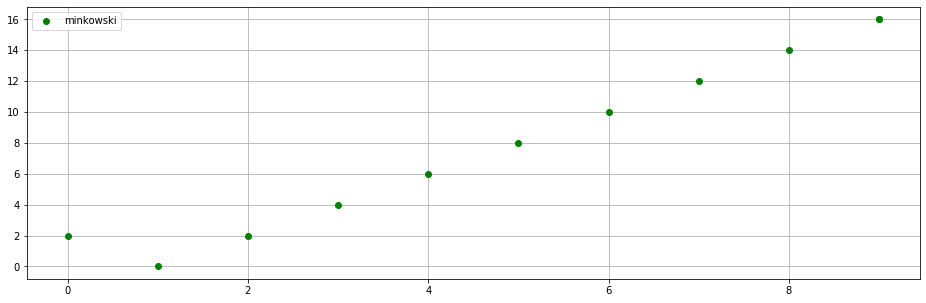

In [4]:
X1 = np.array([1,1])
plt.figure(figsize = (16,5))
                     
for xi in range(10):
    X2 = np.array([xi,xi])
    rc = dist_mincovski(X1,X2,1)
    plt.plot(xi,rc,'og')

plt.plot(xi,rc,'og', label = 'minkowski')   
plt.legend()
plt.grid(True)
plt.show()
    

In [5]:
data = load_iris()
X, y = data.data, data.target
X_train_tr, X_test_tr, y_train_tr, y_test_tr = train_test_split(X, y, test_size=0.2, random_state=1)


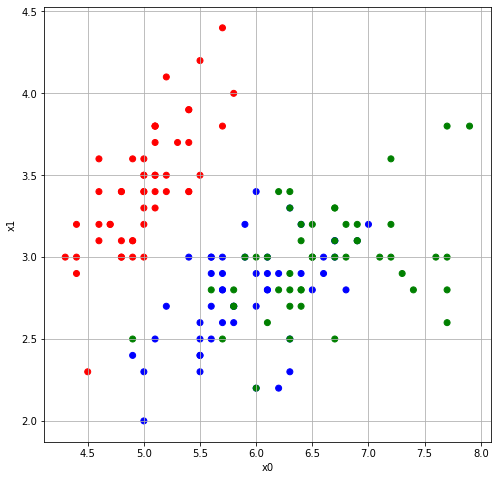

In [6]:
colors = ListedColormap(['red', 'blue','green'])

plt.figure(figsize=(8, 8))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=y, cmap=colors)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [7]:
# максимальное внутрикластерное расстояние
def in_claster(X,p):
    d = 0
    for i in range(X.shape[0]-1):
        for j in range(i+1,X.shape[0]-1):
            r = distance.minkowski(X[i,:],X[j,:],p)
            if r>d:
                d = r
    return d      
# минимальное межкластерное расстояние
def out_claster(X1,X2,p):
    d = np.inf
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            r = distance.minkowski(X1[i,:],X2[j,:],p)
            if r<d:
                d = r
    return d          

In [8]:
r = 100
# Среднее внутрикластерное расстояние
K = 0
K_max = []
for k in range(3):
    print('кластер :', k)
    r = in_claster(X_train_tr[y_train_tr == k,:],r)
    K += r
    K_max.append(r)
print('среденее внутриклассовое :',K/3)
K_min = []
for k1 in range(3):
    for k2 in range(k1+1,3):
        d = out_claster(X_train_tr[y_train_tr == k1,:],X_train_tr[y_train_tr == k2,:],r)
        print('пара: ',k1,k2, ':', d)
        K_min.append(d)
K_dunn = min(K_min) / max(K_max)
print('Индекс Данна :',K_dunn)   

кластер : 0
кластер : 1
кластер : 2
среденее внутриклассовое : 2.7166321576635206
пара:  0 1 : 1.5661223936192614
пара:  0 2 : 2.729331943638049
пара:  1 2 : 0.20534092479912308
Индекс Данна : 0.060208274580456765


Вывод: данные 1 и 2 находятся ближе всего к друг другу и на расстоянии, никак не пересекаясь, с данными 3

In [9]:
# минимальное межкластерное расстояние
def out_claster(X1,X2,p):
    d = np.inf
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            r = dist_mincovski(X1[i,:],X2[j,:],p)
            if r<d:
                d = r
    return d     

# Среднее внутрикластерное расстояние
K = 0
K_max = []
for k in range(3):
    #print('кластер :', k)
    r = in_claster(X_train[y_train == k,:],2)
    K += r
    K_max.append(r)
print('среденее внутриклассовое :',K/3)  

K_min = []
for k1 in range(3):
    for k2 in range(k1+1,3):
        d = out_claster(X_train[y_train == k1,:],X_train[y_train == k2,:],2)
        #print('пара: ',k1,k2, ':', d)
        K_min.append(d)
K_dunn = min(K_min) / max(K_max)
print('Индекс Данна :',K_dunn)  

среденее внутриклассовое : 2.984817878793505
Индекс Данна : 0.006538322262074269


## Обучение без учителя. Кластеризация. K-means

До этого мы рассматривали методы обучения с учителем, то есть задачи, в которых изначально есть размеченная обучающая выборка данных с известными ответами на них и тестовая выборка, на которой проверяется качество алгоритма. В этом разделе речь пойдет об _обучении без учителя (unsupervised learning)_ - случае, когда в роли обучающей выборки выступает просто набор объектов $x_{1},...,x_{l}$, и он же выступает в роли тестовой выборки, а задача состоит в проставлении меток $y_{1},...,y_{l}$ так, что бы объекты с одной и той же меткой были похожи, а с разными - нет. То есть все объекты в пространстве признаков нужно разделить на группы, найти структуру в данных. Это и называется _кластеризацией_. Если раньше мы имели примеры ответов $y$, то сейчас их нет, и нужно строить свои отображения $x \rightarrow y$, отвечающие некоторым свойствам, например, тому, что похожие объекты отображаются в одну метку, а непохожие - в разные. По-простому задачу кластеризации можно сформулировать так: имеется множество точек, которые скапливаются в сгустки, нужно найти возможность относить точки к тому или иному сгустку и предсказывать, в какой сгусток попадет новая точка.

Примерами кластеризации может быть группирование новостей по темам, музыки по жанрам, клиентов по типу поведения и т.д.

Логично возникает вопрос, как измерять качество кластеризации. Есть большое количество инструментов оценки качества кластеризации, они разделяются на _внутренние_ (основанные только на свойствах выборки и кластеров) и _внешние_ (использующие данные об истинном распределении объектов по кластерам, если оно известно).

Примерами внутренних метрик могут быть:

- Внутрикластерное расстояние (также называется компактностью кластеров, cluster cohesion): $$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho(x_{i}, c_{k}),$$ где $K$ - количество кластеров, $c_{k}$ - центр кластера. Этот функционал нужно минимизировать, так как в идеальном случае все объекты в одном кластере одинаковы, и расстояние между ними равно нулю.


- Межкластерное расстояние (отделимость кластеров, cluster separation): $$\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho(x_{i}, x_{j}).$$ Этот функционал наоборот нужно максимизировать, так как объекты из разных кластеров должны максимально различаться, то есть иметь максимальное расстояние между собой.

    - Часто используются те же формулы, но включающие не расстояние ρ, а его квадрат, получая квадратичное внутрикластерное и межкластерное расстояние:

    $$\sum_{k=1}^{K}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k}),$$
    $$\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho^{2}(x_{i}, x_{j}).$$


- Среднее внутрикластерное расстояние (среднее расстояние внутри каждого кластера, просуммированное по всем кластерам) и среднее межкластерное расстояние (минимизируется и максимизируется, соответственно, по аналогии с двумя первыми функционалами):

    $$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho(x_{i}, c_{k}),$$
    $$\frac{1}{K}\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho(x_{i}, x_{j}),$$ где $|k|$ - количество элементов в кластере под номером $k$.

    - По аналогии с квадратичным внутрикластерным и межкластерным расстоянием - среднее квадратичное внутрикластерное и межкластерное расстояние.

    $$\sum_{k=1}^{K}\frac{1}{|k|}\sum_{i=1}^{l}[a(x_{i})=k]\rho^{2}(x_{i}, c_{k}),$$
    $$\frac{1}{K}\sum_{i,j=1}^{l}[a(x_{i}) \neq a(x_{j})]\rho^{2}(x_{i}, x_{j}).$$ 

- Отношение внутрикластерного и межкластерного расстояний (или средних), минимизируется.


- Индекс Данна (Dunn Index): $$\frac{\text{min}_{1\leq k \leq k' \leq K}d(c_{k},c_{k'})}{\text{max}_{1\leq k \leq K} d(k)},$$ где $d(c_{k},c_{k'})$ - расстояние между кластерами $k$ и $k'$ (между их центрами), $d(k)$ - внутрикластерное расстояние для кластера $k$. Этот функционал требуется максимизировать.

In [10]:
# максимальное внутрикластерное расстояние
def in_claster(X,p):
    d = 0
    for i in range(X.shape[0]-1):
        for j in range(i+1,X.shape[0]-1):
            r = dist_mincovski(X[i,:],X[j,:],p)
            if r>d:
                d = r
    return d            

# минимальное межкластерное расстояние
def out_claster(X1,X2,p):
    d = np.inf
    for i in range(X1.shape[0]):
        for j in range(X2.shape[0]):
            r = dist_mincovski(X1[i,:],X2[j,:],p)
            if r<d:
                d = r
    return d         

Оценим расстояния между группами для набора примеров из ирисов Фишера (2 координаты):

In [11]:
# Среднее внутрикластерное расстояние
K = 0
K_max = []
for k in range(3):
    print('кластер :', k)
    r = in_claster(X_train[y_train == k,:],2)
    K += r
    K_max.append(r)
print('среденее внутриклассовое :',K/3)  

K_min = []
for k1 in range(3):
    for k2 in range(k1+1,3):
        d = out_claster(X_train[y_train == k1,:],X_train[y_train == k2,:],2)
        print('пара: ',k1,k2, ':', d)
        K_min.append(d)
K_dunn = min(K_min) / max(K_max)
print('Индекс Данна :',K_dunn)  

кластер : 0
кластер : 1
кластер : 2
среденее внутриклассовое : 4.636666666666667
пара:  0 1 : 1.805
пара:  0 2 : 4.915000000000001
пара:  1 2 : 0.025
Индекс Данна : 0.003419972640218879


Индекс Данна : 0.0, т.к. есть одинаковые объекты.

Задание 2.

2.1 оценить Межкластерное расстояние (отделимость кластеров, cluster separation) для своего варианта (по заданию 1) в примерах из Ирисов Фишера
2.2. Сравнить с индексом Данна из примера

In [12]:
K_min = []
for k1 in range(3):
    for k2 in range(k1+1,3):
        d = out_claster(X_train[y_train == k1,:],X_train[y_train == k2,:],2)
        #print('пара: ',k1,k2, ':', d)
        K_min.append(d)
K_separation = min(K_min)
print('Межкластерное расстояние :',K_separation)  

Межкластерное расстояние : 0.025


### Алгоритм K-means (K-средних)

Одним из самых простых и популярных алгоритмов кластеризации является алгоритм _K-means (K-средних)_. Заключается он в следующих шагах:

1 . Выбрать количество кластеров $k$, на которые будут делиться данные.

2 . Случайным образом выбрать в пространстве данных $k$ точек $c_{k}$ (центроидов) - центров будущих кластеров.

3 . Для каждой точки из выборки посчитать, к какому из центроидов она ближе.

4 . Переместить каждый центроид в центр выборки, отнесенной к этому центроиду, определив его как среднее арифметическое всех точек кластера:

$$c_{k} = \frac{\sum_{i=1}^{l}[a(x_{i})=k]x_{i}}{\sum_{i=1}^{l}[a(x_{i}) = k]}.$$
5 . Повторить шаги 3-4 до сходимости алгоритма (обычно это оценивается по величине смещения центроида после каждого шага - сходимость означает непревышение смещения какого-то заданного значения).

Результат работы алгоритма значительно зависит от начального выбора центроидов. Существует много методик их выбора, наиболее удачным из которых считается k-means++. Он заключается в последовательном выборе начальных приближений так, что вероятность выбрать в качестве центроида следующую точку пропорциональна квадрату расстояния от нее до ближайшего центроида.

Проблемой метода также является необходимость знать число кластеров, на которые будет делиться выборка. В случае, когда это число неизвестно, вариантом ее решения может быть последовательная кластеризация на разное число кластеров (например, от 1 до 10) с последующим анализом качества работы алгоритма, например, по сумме квадратов внутрикластерных расстояний $$\sum_{k=1}^{K}\sum_{i \in C_{k}}\rho(x_{i}, c_{k})^{2}$$ - выбирается такое число кластеров, начиная с которого при увеличении количества кластеров функционал падает незначительно.

Сделаем простую реализацию алгоритма K-means своими руками на Python.

Вначале сгенерируем три облака точек с помощью инструментов `sklearn`.

In [13]:
from sklearn.datasets import make_blobs
import random

X, y = make_blobs(n_samples=800, centers = 3, random_state=1)
X[:,1] *= 1

In [14]:
from sklearn.cluster import DBSCAN, KMeans
 


In [41]:
def kmeans(data, k, max_iterations, min_distance):    
    # инициализируем центроиды как первые k элементов датасета
    centroids = [data[i] for i in range(k)]
    
    for _ in range(max_iterations):
        # Создадим словарь для классификации
        classes = {i: [] for i in range(k)}
        
        # классифицируем объекты по центроидам
        for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            classes[classification].append(x)
        
        # сохраним предыдущие центроиды в отдельный список для последующего сравнения сновыми
        old_centroids = centroids.copy()
        
        # пересчитаем центроиды как среднее по кластерам
        for classification in classes:
            centroids[classification] = np.average(classes[classification], axis=0)
            
        # сравним величину смещения центроидов с минимальной
        optimal = True
        for centroid in range(len(centroids)):
            if np.sum(abs((centroids[centroid] - old_centroids[centroid]) / old_centroids * 100)) > min_distance:
                optimal = False
                
        # если все смещения меньше минимального, останавливаем алгоритм  
        if optimal:
            break
    
    return old_centroids, classes
def kmeans_predict(centroids, data):    
    # инициализируем центроиды как первые k элементов датасета
    classes = [i for i in range(len(centroids))]
    label = []
    # классифицируем объекты по центроидам
    for x in data:
            # определим расстояния от объекта до каждого центроида
            distances = [e_metrics(x, centroid) for centroid in centroids]
            # отнесем объект к кластеру, до центроида которого наименьшее расстояние
            classification = distances.index(min(distances))
            #print(classification)
            label.append(classification)
    return label
def visualize(centroids, classes):
    colors = ['r', 'g', 'b','m','y']
    
    plt.figure(figsize=(7,7))
    
    # нанесем на график центроиды
    for centroid in centroids:
        plt.scatter(centroid[0], centroid[1], marker='x', s=130, c='black')
        
    # нанесем объекты раскрашенные по классам
    for class_item in classes:
        for x in classes[class_item]:
            plt.scatter(x[0], x[1], color=colors[class_item])
    plt.grid(True)        
    plt.show()

Задание 3.

3.1.Сформировать Гауссову смесь (make_blobs) из 3-х центров по 100 объектов каждого источника  3 раза, использовать алгоритм KMeans и сохранить результаты построения центров. 

3.2. Сравнить результаты моделирования центров

Задание 4.

4.1. Оценить рост времени на решение задачи кластерного анализа (KMeans или DBSCAN) при изменении числа примеров (от 10 до 1010 на источник с шагом 100)

4.2. Построить график (Помним, что первый запуск модели дает большое время расчета. Исполняем алгоритм 4 раза и используем для оценки времени 3 последних результата).





Задание 5.

5.1. Оценить рост времени на решение задачи кластерного анализа (KMeans или DBSCAN)  при изменении числа признаков (от 15 до 2) (смотрим документациюhttps://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_blobs.html)



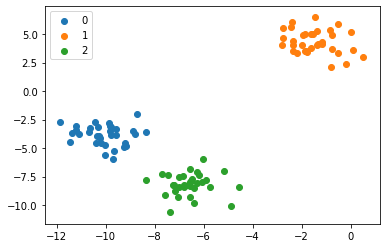

In [49]:
#3

X, y = make_blobs(n_samples=100, centers = 3, random_state=1)
X[:,1] *= 1
kmeans = KMeans(n_clusters=3, random_state=0)
label = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
k=0
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
    k+=1
plt.legend()
plt.show()


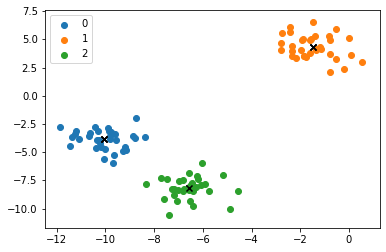

[1 0 0 0 2 2 2 0 1 1 0 0 2 1 2 2 2 1 0 0 2 0 2 1 0 2 2 1 1 2 1 1 2 1 0 2 0
 0 0 2 2 0 1 0 0 2 1 1 1 1 0 2 2 2 1 2 0 0 1 1 0 2 2 0 0 2 1 2 1 0 0 0 2 1
 1 0 2 2 1 0 1 0 0 2 1 1 1 1 0 1 2 1 1 0 0 2 2 1 2 1]


In [90]:
#3

X, y = make_blobs(n_samples=100, centers = 3, random_state=1)
X[:,1] *= 1
kmeans = KMeans(n_clusters=3)
label = kmeans.fit_predict(X)
centroids = kmeans.cluster_centers_
u_labels = np.unique(label)
centroids_x=centroids[:,0]
centroids_y=centroids[:,1]
for i in u_labels:
    plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
    plt.scatter(centroids_x,centroids_y,marker='x',color='k')
plt.legend()
plt.show()
print(label)

In [16]:
#4
import time
def time_c():
    tic = time.perf_counter()
    toc = time.perf_counter()
    print(f"Вычисление заняло {toc - tic:0.4f} секунд")

100


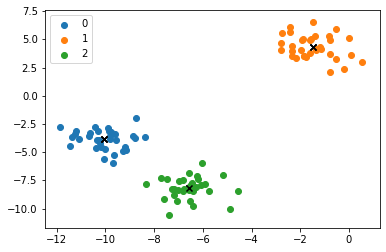

Вычисление заняло 0.2930 секунд
200


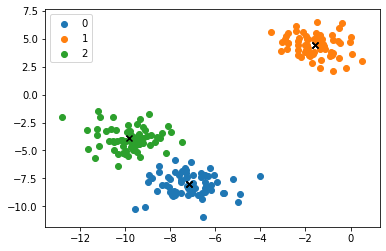

Вычисление заняло 0.2779 секунд
300


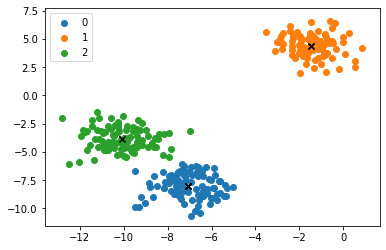

Вычисление заняло 0.2837 секунд
400


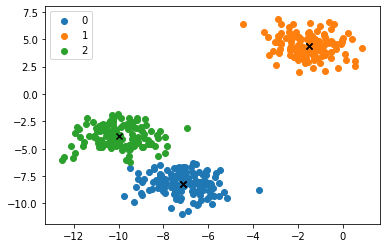

Вычисление заняло 0.2892 секунд
500


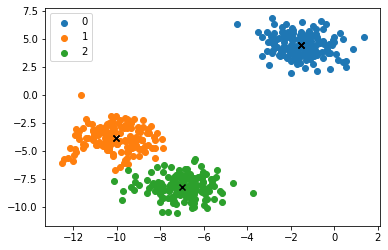

Вычисление заняло 0.2965 секунд
600


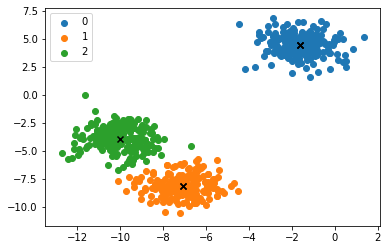

Вычисление заняло 0.2978 секунд
700


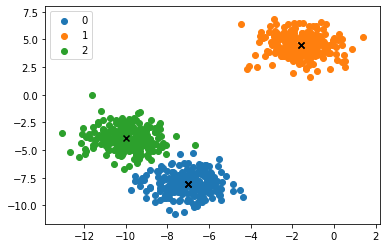

Вычисление заняло 0.3661 секунд
800


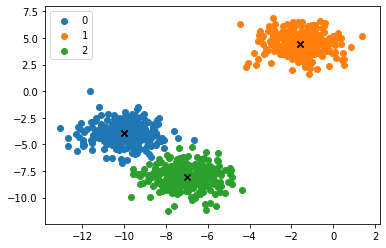

Вычисление заняло 0.2994 секунд
900


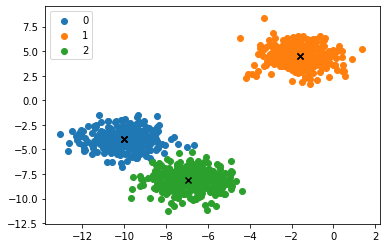

Вычисление заняло 0.3120 секунд
1000


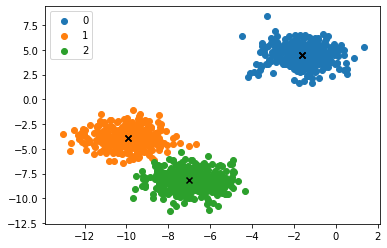

Вычисление заняло 0.3038 секунд


In [83]:
tm=[]
for i in range(10,1011,100):
    print(i)
    tic = time.perf_counter()
    X, y = make_blobs(n_samples=i, centers = 3, random_state=1)
    X[:,1] *= 1
    kmeans = KMeans(n_clusters=3).fit(X)
    label = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    centroids_x=centroids[:,0]
    centroids_y=centroids[:,1]
    u_labels = np.unique(label)
    for i in u_labels:
        plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
        plt.scatter(centroids_x,centroids_y,marker='x',color='k')
    plt.legend()
    plt.show()
    toc = time.perf_counter()
    tm.append(toc-tic)
    print(f"Вычисление заняло {toc - tic:0.4f} секунд")

 

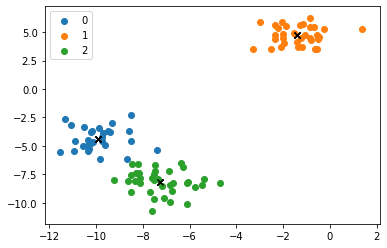

Вычисление заняло 0.2619 секунд


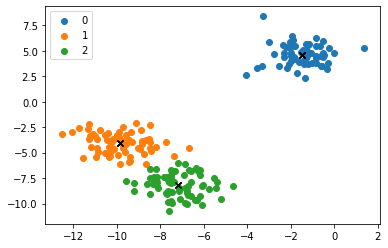

Вычисление заняло 0.2670 секунд


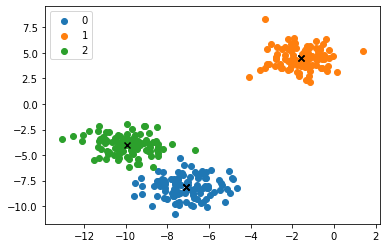

Вычисление заняло 0.2706 секунд


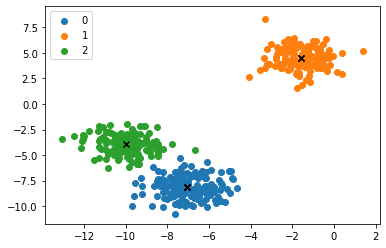

Вычисление заняло 0.2712 секунд


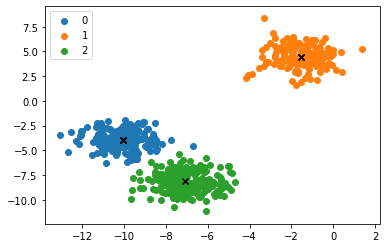

Вычисление заняло 0.2731 секунд


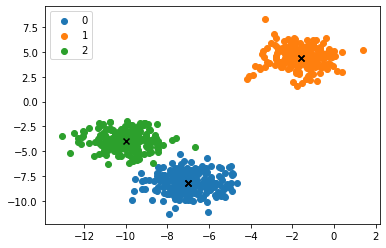

Вычисление заняло 0.3252 секунд


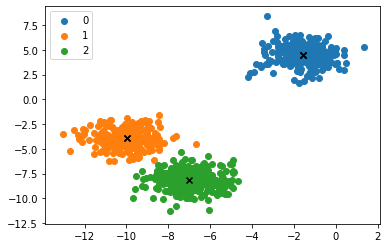

Вычисление заняло 0.2843 секунд


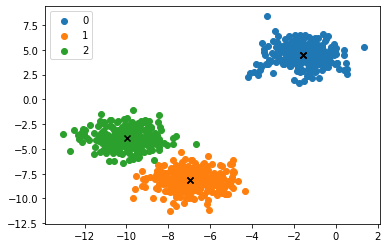

Вычисление заняло 0.2834 секунд


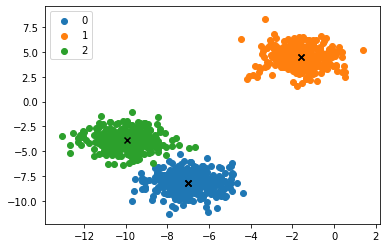

Вычисление заняло 0.2811 секунд


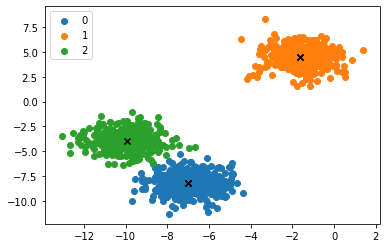

Вычисление заняло 0.2816 секунд


In [104]:
tm=[]
for i in range(100,1011,100):
    tic = time.perf_counter()
    X, y = make_blobs(n_samples=1000, centers = 3, random_state=1)
    X[:,1] *= 1
    XT=X[1:i,:]
    kmeans = KMeans(n_clusters=3)
    label = kmeans.fit_predict(XT)
    centroids = kmeans.cluster_centers_
    centroids_x=centroids[:,0]
    centroids_y=centroids[:,1]
    u_labels = np.unique(label)
    for j in u_labels:
        plt.scatter(XT[label == j , 0] , XT[label == j , 1] , label = j)
        plt.scatter(centroids_x,centroids_y,marker='x',color='k')
    plt.legend()
    plt.show()
    toc = time.perf_counter()
    tm.append(toc-tic)
    print(f"Вычисление заняло {toc - tic:0.4f} секунд")

 

In [98]:
X[1,1]

-3.7271487905200478

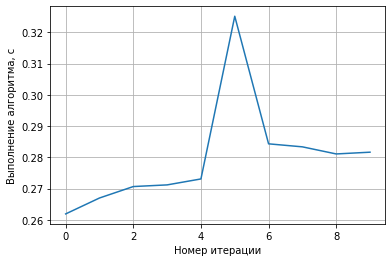

In [105]:
len(tm)
tm2 = [i for i in range(len(tm))]
plt.plot(tm2,tm)
plt.xlabel('Номер итерации')
plt.ylabel('Выполнение алгоритма, с')
plt.grid(True)

15


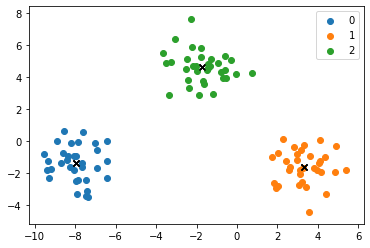

Вычисление заняло 0.2861 секунд
14


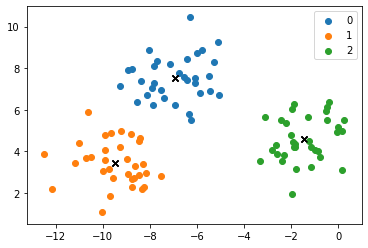

Вычисление заняло 0.2620 секунд
13


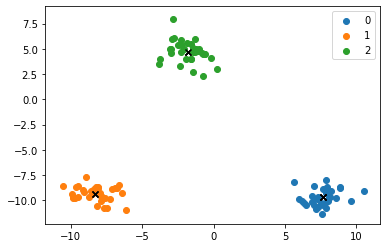

Вычисление заняло 0.2610 секунд
12


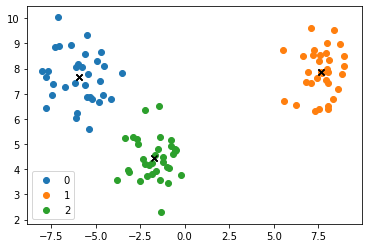

Вычисление заняло 0.2746 секунд
11


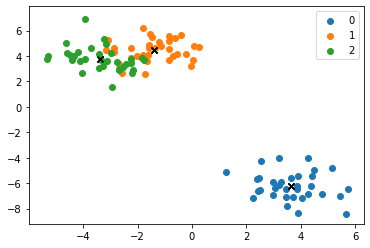

Вычисление заняло 0.2734 секунд
10


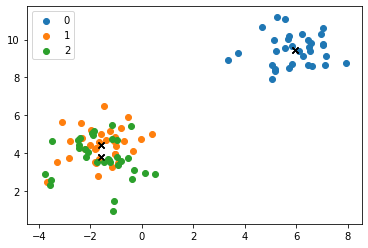

Вычисление заняло 0.2597 секунд
9


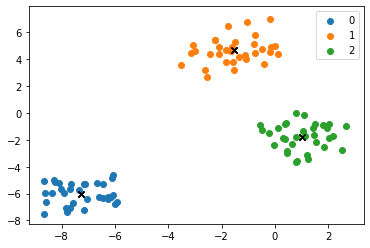

Вычисление заняло 0.2669 секунд
8


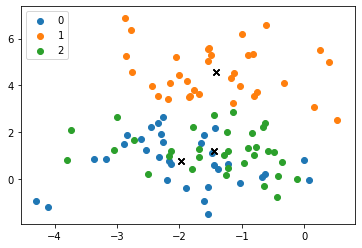

Вычисление заняло 0.2510 секунд
7


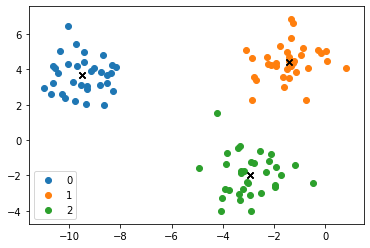

Вычисление заняло 0.2586 секунд
6


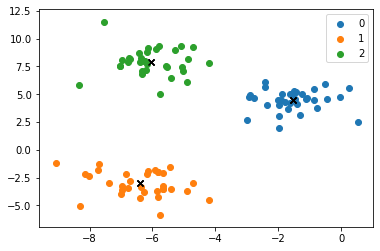

Вычисление заняло 0.3149 секунд
5


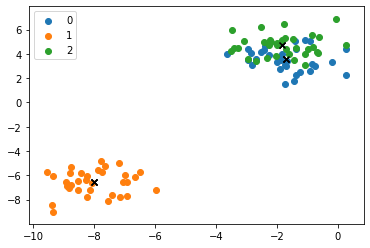

Вычисление заняло 0.2657 секунд
4


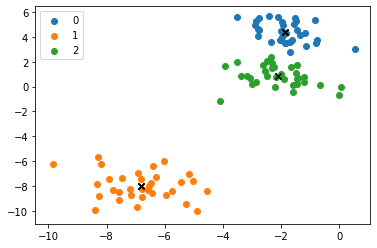

Вычисление заняло 0.2662 секунд


In [74]:
tm=[]
for i in range(15,2+1,-1):
    print(i)
    tic = time.perf_counter()
    X, y = make_blobs(n_samples=100, n_features=i, centers = 3, random_state=1)
    X[:,1] *= 1
    kmeans = KMeans(n_clusters=3).fit(X)
    label = kmeans.fit_predict(X)
    centroids = kmeans.cluster_centers_
    centroids_x=centroids[:,0]
    centroids_y=centroids[:,1]
    u_labels = np.unique(label)
    for i in u_labels:
        plt.scatter(X[label == i , 0] , X[label == i , 1] , label = i)
        plt.scatter(centroids_x,centroids_y,marker='x',color='k')
    plt.legend()
    plt.show()
    toc = time.perf_counter()
    tm.append(toc-tic)
    print(f"Вычисление заняло {toc - tic:0.4f} секунд")


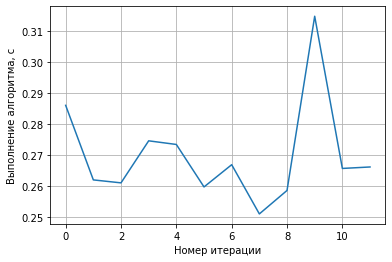

In [75]:
len(tm)
tm2 = [i for i in range(len(tm))]
plt.plot(tm2,tm)
plt.xlabel('Номер итерации')
plt.ylabel('Выполнение алгоритма, с')
plt.grid(True)

Задание 6 практическое

6.1. Кластеризация векторных описаний образцов:

• Выбрать метрику для измерения расстояния между объектами ( метрики Минковского по вариантам из задания 1 ).

• Провести кластеризацию объектов (графических - взять цветную фотографию и загрузить в рабочую среду) 

6.2. Сегментация по признакам цвета:
• Прочитать цветное изображение (A)
• Выбрать 500 случайных точек этого изображения (x=randint(1 ,A.shape[1],(1,500)); y= randint(1 ,A.shape[0],(1,500)) и из значений цвета RGB составить данные для кластерного анализа (Data +=[ x[i]  y[i] A[x[i],y[i],0] A[x[i],y[i],1]  A[x[i],y[i],2] ]).
• Провести кластерный анализ для созданной модели данных на 5-7 кластеров.
• Разметить файл изображения по принципу минимума расстояния на принадлежащие разным кластерам (выбираем последовательно с шагом 5-10 пикселей точки и строим вектор для анализа v=[x ,y ,A[x,y,1], A[x,y,2] ,A[x,y,3]]).
• Проверяем по правилу ближайший сосед (лаб.раб 6) принадлежность к классу.
• Визуализировать результат (показать какие объекты попали в один кластер на картинке (отметить маркером цвета соответствующего класса))

6.3. Составить отчет (задание, выбор мер, алгоритм, блок-схема алгоритма, результаты кластерного анализа)

In [7]:
from PIL import Image

from random import randint
im = Image.open('123.jpg')
im = np.array(im)

Data = []
x = np.random.randint(1, im.shape[0], (500))
y= np.random.randint(1, im.shape[1], (500))
Data =[[ x[i]/im.shape[0]*256, y[i]/im.shape[1]*256,im[x[i],y[i],0], im[x[i],y[i],1], im[x[i],y[i],2]] for i in range(500)]
kmean = KMeans(n_clusters=7).fit(Data)

In [8]:
kmean.cluster_centers_

array([[ 81.93385281, 184.01731602, 129.45454545, 114.31168831,
        104.92207792],
       [186.85452736, 107.04477612,  46.46268657,  24.7761194 ,
         23.97014925],
       [162.26461538,  54.59487179, 133.52564103,  89.61538462,
         98.97435897],
       [ 61.29558974,  40.09641026, 218.44615385, 203.96923077,
        220.01538462],
       [174.00715447, 104.27317073, 193.48780488, 177.07317073,
        176.80487805],
       [ 49.6896    , 173.97333333,  50.57333333,  40.2       ,
         34.34666667],
       [197.63024055, 208.76426117,  66.48453608,  44.79381443,
         37.05154639]])

In [11]:
kmean.cluster_centers_ - v

array([[-171.93281385,  -70.64935065,   66.45454545,   91.31168831,
          73.92207792],
       [ -67.0121393 , -147.62189055,  -16.53731343,    1.7761194 ,
          -7.02985075],
       [ -91.60205128, -200.07179487,   70.52564103,   66.61538462,
          67.97435897],
       [-192.57107692, -214.57025641,  155.44615385,  180.96923077,
         189.01538462],
       [ -79.8595122 , -150.39349593,  130.48780488,  154.07317073,
         145.80487805],
       [-204.17706667,  -80.69333333,  -12.42666667,   17.2       ,
           3.34666667],
       [ -56.23642612,  -45.9024055 ,    3.48453608,   21.79381443,
           6.05154639]])

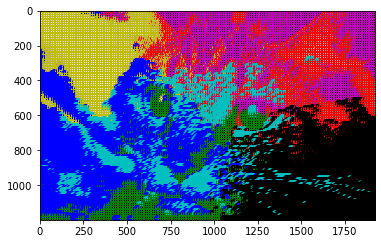

In [10]:
plt.imshow(im)
s = ['r+','g+','bo','y+','co','m+','ko']
for i in range(0,im.shape[0],10):
  for j in range(0,im.shape[1],10):
    v = np.array([ i/im.shape[0]*256, j/im.shape[1]*256,im[i,j,0], im[i,j,1], im[i,j,2]])
    d = np.linalg.norm(kmean.cluster_centers_ - v,axis=1)
    # print(d)
    k = np.argmin(d)
    plt.plot(j,i,s[k])
plt.show()

In [13]:
from PIL import Image
from random import randint
im = Image.open('123.jpg')
im = np.array(im)

Data = []
x = np.random.randint(1, im.shape[0], (500))
y= np.random.randint(1, im.shape[1], (500))
Data =[[ x[i]/im.shape[0]*256, y[i]/im.shape[1]*256,im[x[i],y[i],0], im[x[i],y[i],1], im[x[i],y[i],2],im[x[i+1],y[i+1],0], im[x[i+1],y[i+1],1], im[x[i+1],y[i+1],2],
        im[x[i+1],y[i],0], im[x[i+1],y[i],1], im[x[i+1],y[i],2],im[x[i],y[i+1],0], im[x[i],y[i+1],1], im[x[i],y[i+1],2],im[x[i+1],y[i-1],0], im[x[i+1],y[i-1],1], im[x[i+1],y[i-1],2],
        im[x[i-1],y[i+1],0], im[x[i-1],y[i+1],1], im[x[i-1],y[i+1],2],im[x[i-1],y[i-1],0], im[x[i-1],y[i-1],1], im[x[i-1],y[i-1],2],im[x[i-1],y[i],0], im[x[i-1],y[i],1], im[x[i-1],y[i],2],
        im[x[i],y[i-1],0], im[x[i],y[i-1],1], im[x[i],y[i-1],2]] for i in range(499)]
kmean = KMeans(n_clusters=7).fit(Data)

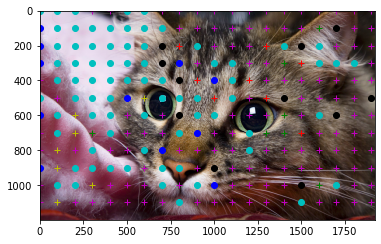

In [14]:
plt.imshow(im)
s = ['r+','g+','bo','y+','co','m+','ko']
for i in range(0,im.shape[0],100):
  for j in range(0,im.shape[1],100):
    v = np.array([ i/im.shape[0]*256, j/im.shape[1]*256,im[i,j,0], im[i,j,1], im[i,j,2],im[i+1,j+1,0], im[i+1,j+1,1], im[i+1,j+1,2],im[i+1,j,0], im[i+1,j,1], im[i+1,j,2],im[i,j+1,0], im[i,j+1,1], im[i,j+1,2],
                  im[i+1,j-1,0], im[i+1,j-1,1], im[i+1,j-1,2],im[i-1,j+1,0], im[i-1,j+1,1], im[i-1,j+1,2],im[i-1,j-1,0], im[i-1,j-1,1], im[i-1,j-1,2],im[i-1,j,0], im[i-1,j,1], im[i-1,j,2],im[i,j-1,0], im[i,j-1,1], im[i,j-1,2]])
    d = np.linalg.norm(kmean.cluster_centers_ - v,axis=1)
    k = np.argmin(d)
    plt.plot(j,i,s[k])
plt.show()

In [15]:
from PIL import Image
from random import randint
im = Image.open('123.jpg')
im = np.array(im)

Data = []
x = np.random.randint(1, im.shape[0], (500))
y= np.random.randint(1, im.shape[1], (500))
Data =[[im[x[i],y[i],0], im[x[i],y[i],1], im[x[i],y[i],2],im[x[i+1],y[i+1],0], im[x[i+1],y[i+1],1], im[x[i+1],y[i+1],2],
        im[x[i+1],y[i],0], im[x[i+1],y[i],1], im[x[i+1],y[i],2],im[x[i],y[i+1],0], im[x[i],y[i+1],1], im[x[i],y[i+1],2],im[x[i+1],y[i-1],0], im[x[i+1],y[i-1],1], im[x[i+1],y[i-1],2],
        im[x[i-1],y[i+1],0], im[x[i-1],y[i+1],1], im[x[i-1],y[i+1],2],im[x[i-1],y[i-1],0], im[x[i-1],y[i-1],1], im[x[i-1],y[i-1],2],im[x[i-1],y[i],0], im[x[i-1],y[i],1], im[x[i-1],y[i],2],
        im[x[i],y[i-1],0], im[x[i],y[i-1],1], im[x[i],y[i-1],2]] for i in range(499)]
kmean = KMeans(n_clusters=7).fit(Data)

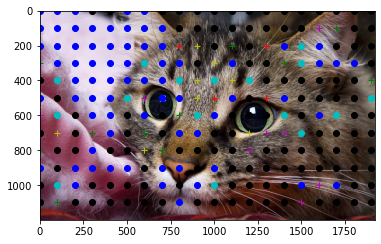

In [16]:
plt.imshow(im)
s = ['r+','g+','bo','y+','co','m+','ko']
for i in range(0,im.shape[0],100):
  for j in range(0,im.shape[1],100):
    v = np.array([im[i,j,0], im[i,j,1], im[i,j,2],im[i+1,j+1,0], im[i+1,j+1,1], im[i+1,j+1,2],im[i+1,j,0], im[i+1,j,1], im[i+1,j,2],im[i,j+1,0], im[i,j+1,1], im[i,j+1,2],
                  im[i+1,j-1,0], im[i+1,j-1,1], im[i+1,j-1,2],im[i-1,j+1,0], im[i-1,j+1,1], im[i-1,j+1,2],im[i-1,j-1,0], im[i-1,j-1,1], im[i-1,j-1,2],im[i-1,j,0], im[i-1,j,1], im[i-1,j,2],im[i,j-1,0], im[i,j-1,1], im[i,j-1,2]])
    d = np.linalg.norm(kmean.cluster_centers_ - v,axis=1)
    k = np.argmin(d)
    plt.plot(j,i,s[k])
plt.show()

## Литература

1. DBSCAN : https://habr.com/ru/articles/322034/
2. Кластеризация : https://scikit-learn.ru/clustering/
3. 
5. [Оценка качества кластеризации](http://neerc.ifmo.ru/wiki/index.php?title=%D0%9E%D1%86%D0%B5%D0%BD%D0%BA%D0%B0_%D0%BA%D0%B0%D1%87%D0%B5%D1%81%D1%82%D0%B2%D0%B0_%D0%B2_%D0%B7%D0%B0%D0%B4%D0%B0%D1%87%D0%B5_%D0%BA%D0%BB%D0%B0%D1%81%D1%82%D0%B5%D1%80%D0%B8%D0%B7%D0%B0%D1%86%D0%B8%D0%B8)
6. [Обзор алгоритмов кластеризации данных](https://habr.com/ru/post/101338/)
7. [Работа алгоритмов кластеризации на классах разной формы](https://scikit-learn.org/stable/modules/clustering.html)

## Summary

__kNN__
* Метрический алгоритм классификации по "ближайшим соседям"
* Разновидности: ближайший сосед, k ближайших соседей, k взвешанных ближайших соседей
* Алгоритм интерпретируем
* В основе алгоримта лежит _гипотеза компактности_: если мера сходства объектов введена достаточно удачно, то схожие объекты гораздо чаще лежат в одном классе, чем в разных
* Проблемы и их решения
    * Выбор метрики __->__ нет единого алгоритма, позволяющего выбрать метрику, поэтому используют что-то из "стандартного" (например, Евклидова)
    * Выбор числа соседей k __->__ подбор на основании кросс-валидации, чаще даже по контролю одного объекта (leave-one-out cross-validation)
    * Выбросы/шум __->__ ручной отсев, придание меньшего веса, либо поиск типичных представителей классов (эталонов) алгоритмом STOLP, тогда объект можно классифицировать по ближайшему эталону
    * Большие выборки __->__ уменьшение выборки за счет удаления неинформативных объектов (например, оставить только эталоны), либо более быстрые структуры данных (например, kd-деревья)
    * Много признаков - "проклятие размерности" - суммы большого числа отклонений по отдельным признакам с большой вероятностью имеют очень близкие значения (согласно закону больших чисел), то есть в пространстве высокой размерности все объекты примерно одинаково далеки друг от друга __->__ предварительный отбор признаков (feature selection)

__k-means__
* Кластеризует неразмеченные объекты, помогая найти структуру в данных
* Использует метрику близости, является метрическим алгоритмом
* Можно использовать для генерации нового признака - номера кластера
* Проблемы и их решения
    * Алгоритм чувствителен к выбору начальных центров кластеров __->__ как вариант, на начальном этапе принимать в качестве центров самые отдаленные точки
    * Необходимо заранее знать количество кластеров __->__ выбор исходя из природы данных, либо оценка исходя из распределений признаков или 2D представления объектов (PCA)
    * Не справляется с задачей, когда объект принадлежит к разным кластерам в равной степени или не принадлежит ни одному __->__ выбирать случайно ответ, либо ввести более сложную функцию весов
    * Не гарантируется достижение глобального минимума суммарного квадратичного отклонения, а только одного из локальных минимумов (пример на картинке ниже) __->__ инициализировать начальные центры не случайно
    
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/7/7c/K-means_convergence_to_a_local_minimum.png/1920px-K-means_convergence_to_a_local_minimum.png" style="width: 1000px;">

## Д/з

1. К алгоритму kNN, реализованному на уроке, реализовать добавление весов соседей по любому из показанных на уроке принципов.
2. Написать функцию подсчета метрики качества кластеризации как среднее квадратичное внутрикластерное расстояние и построить график ее зависимости от k (взять от 1 до 10) для выборки данных из данного урока.

# OOB

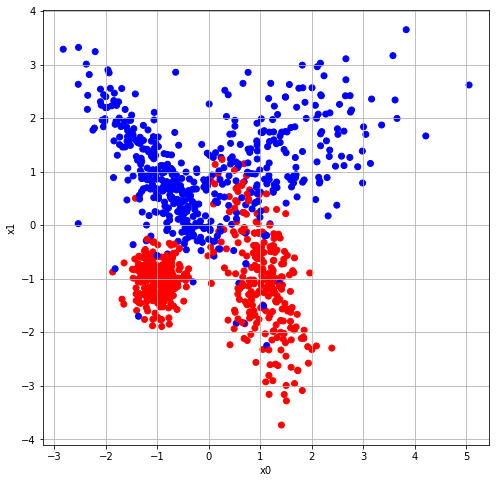

In [7]:
import numpy as np
import sklearn.datasets as datasets


# сгенерируем данные
classification_data, classification_labels = datasets.make_classification(n_samples=1000,n_features = 2, n_informative = 2, 
                                                      n_classes = 2, n_redundant=0, 
                                                      n_clusters_per_class=2, random_state=5)


# визуализируем сгенерированные данные

colors = ListedColormap(['red', 'blue'])
light_colors = ListedColormap(['lightcoral', 'lightblue'])

plt.figure(figsize=(8,8))
plt.scatter(list(map(lambda x: x[0], classification_data)), list(map(lambda x: x[1], classification_data)), 
              c=classification_labels, cmap=colors)
plt.grid()
plt.xlabel('x0')
plt.ylabel('x1')
plt.show()

In [8]:
from sklearn.tree import DecisionTreeClassifier

In [9]:
np.random.shuffle(np.arange(classification_labels.shape[0]))

In [10]:
frq = np.zeros_like(classification_labels) # счетчик 
pred = np.zeros_like(classification_labels).astype(float)  #  накопление предиктов
n_split = 500
# строим случайный лес 
RF_=[]
for i in range(100):
    ind_ = np.arange(classification_labels.shape[0])
    np.random.shuffle(ind_)
    #print(ind_)
    ind_test = ind_[:n_split].tolist()
    ind_tr = ind_[n_split:].tolist()
    #print(ind_test)
    x_tr,y_tr = classification_data[ind_tr,:], classification_labels[ind_tr]
    x_test,y_test = classification_data[ind_test,:], classification_labels[ind_test]
    tree_i =DecisionTreeClassifier( ).fit(x_tr,y_tr)
    y_pred = tree_i.predict(x_test)
    RF_.append(tree_i)
    #oob
    pred[ind_test] += np.abs(y_test.astype(float) == y_pred).astype(float)
    frq[ind_test] += 1
    
error = np.mean(pred / frq)
error
    

0.9009257070311086

In [11]:
frq[:5]

array([53, 47, 55, 53, 46])

In [12]:
pred[:5]

array([53., 38., 55., 53., 46.])

In [13]:
pred[:5] / frq[:5]

array([1.        , 0.80851064, 1.        , 1.        , 1.        ])

In [14]:
pred.sum()/frq.sum()

0.90042